## <center>Постановка задачи<center>

ДАННЫЕ:
Есть данные за август 2018 по 2 продуктам (subscriptionName): VIP Предприятие и Предприятие ПРОФ (файл «август2018»). 
Информация по событиям (message) – в файле «События в системе».

ЗАДАНИЕ:
1. Составить любой отчет в любом срезе. Составить пояснительную записку содержащую краткое описание того, что вы получили.
2. Сколько было открытий документа для просмотра из любого места системы для BELAW_154303 (infoBankNameDocId).

In [1]:
# Загрузка библиотек для анализа и манипуляций с данными
import pandas as pd
import numpy as np

# Загрузка библиотек для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Загрузка и чтение данных
data = pd.read_csv('august_2018.csv', index_col = 'timestamp', parse_dates=['timestamp'], sep=',')

# Отобразим первые 5 строк и убедимся что данные корректно загружены
data.head()

,backspin,docsNumber,infoBankNameDocId,inFolder,isTrial,message,pageBlock,pageNumber,pageSection,requestName,...,searchPosition,searchRequest,searchType,sectionFilter,showOnMain,smartPageName,subscriptionName,teamBlock,userCategory,UUID
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-07-31 21:22:24.872000+00:00,True,402.0,NaN,NaN,False,SearchResult,searchResults,1.0,NaN,SearchResult,...,NaN,закупки биржевых товаров на биржевых торгах.,quickSearch,Все,NaN,"Умная страница по теме ""Закупки"". Для продолже...",Предприятие ПРОФ,NaN,Юрист расширенный,13e87918-446c-11e8-ace3-0242ac130004
2018-07-31 21:23:04.444000+00:00,NaN,NaN,NaN,NaN,False,SmartScenario,NaN,NaN,NaN,SmartScenario,...,NaN,NaN,NaN,Все,NaN,"Умная страница по теме ""Закупки"". Для продолже...",Предприятие ПРОФ,NaN,Юрист расширенный,13e87918-446c-11e8-ace3-0242ac130004
2018-07-31 21:23:34.720000+00:00,NaN,NaN,NaN,NaN,False,SearchResult,view-document,NaN,NaN,SearchResult,...,NaN,закупки биржевых товаров на биржевых торгах,docSearch,NaN,NaN,NaN,Предприятие ПРОФ,NaN,Юрист расширенный,13e87918-446c-11e8-ace3-0242ac130004
2018-07-31 21:22:14.885000+00:00,NaN,NaN,NaN,NaN,False,BackLinkFilter,NaN,NaN,NaN,BackLinkFilter,...,NaN,NaN,NaN,Все,NaN,NaN,Предприятие ПРОФ,NaN,Юрист расширенный,001fea66-2d96-11e8-8113-0242ac130003
2018-08-01 03:17:30.898000+00:00,NaN,NaN,NaN,NaN,False,Login,NaN,NaN,NaN,Login,...,NaN,NaN,NaN,NaN,NaN,NaN,Предприятие ПРОФ,NaN,Юрист расширенный,0a78b25e-497f-11e8-b768-0242ac130003


In [3]:
# Посмотрим на размерность данных
data.shape

(382263, 26)

In [4]:
# Посмотрим на тип данных в датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 382263 entries, 2018-07-31 21:22:24.872000+00:00 to 2018-08-20 09:50:32.429000+00:00
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   backspin                108671 non-null  object 
 1   docsNumber              61663 non-null   float64
 2   infoBankNameDocId       162973 non-null  object 
 3   inFolder                1720 non-null    object 
 4   isTrial                 382263 non-null  bool   
 5   message                 382263 non-null  object 
 6   pageBlock               270213 non-null  object 
 7   pageNumber              61871 non-null   float64
 8   pageSection             4903 non-null    object 
 9   requestName             382263 non-null  object 
 10  searchCard_docKind      61656 non-null   object 
 11  searchCard_docNumber    61656 non-null   object 
 12  searchCard_docStatus    61656 non-null   object 
 13  searchCard_exa

Из типа данных видно, что большая часть анализируемых данных является категориальными.

In [5]:
# Выведем результат итоговой статистики по категориальным данным
data.describe(include=['O'])

,backspin,infoBankNameDocId,inFolder,message,pageBlock,pageSection,requestName,searchCard_docKind,searchCard_docNumber,searchCard_docStatus,...,searchCard_organ,searchRequest,searchType,sectionFilter,showOnMain,smartPageName,subscriptionName,teamBlock,userCategory,UUID
count,108671,162973,1720,382263,270213,4903,382263,61656,61656,61656,...,61656,194563,195011,115067,1720,19641,382263,106503,382263,382263
unique,2,24370,2,54,58,5,54,111,338,7,...,69,41268,3,7,2,117,2,18,5,3497
top,True,BELAW_155823,True,SearchResult,view-document,profile,SearchResult,[],-,[],...,[],-,quickSearch,Все,False,"Умная страница по теме ""Командировки"". Для про...",Предприятие ПРОФ,AdminAdmin,Бухгалтер полный,bc3b8ad0-2755-11e8-904c-0242ac130003
freq,68174,3568,956,151040,129365,1704,151040,59821,60163,61244,...,60534,1721,106946,100770,1485,1089,283806,65995,193644,2286


Краткие выводы:
+ поле infoBankNameDocId содержит 24 370 уникальных значений, наиболее часто встречается BELAW_155823 - 3 568 раз;
+ наиболее частым было событие SearchResult	- частота 15 1040 раз;
+ количество уникальных пользовательских категорий 5; наиболее часто встречаемая "Бухгалтер полный"

In [6]:
# Определим количество открытий документа для BELAW_154303
view_doc = data.groupby(['infoBankNameDocId', 'message']).message.count()
print('Количество открытий документа для просмотра из любого места системы для BELAW_154303 - ' +
      str(view_doc['BELAW_154303']['ViewDoc']))

Количество открытий документа для просмотра из любого места системы для BELAW_154303 - 74


In [7]:
# Количество всех событий для документа BELAW_154303
view_doc['BELAW_154303']

message
AddFavorite          1
AddInfo             10
DocLink             10
DocReference         1
MultiLinks           2
ShowContentTable     1
ViewDoc             74
WordExport           2
Name: message, dtype: int64

In [8]:
# Определим количество значений по продуктам
data.subscriptionName.value_counts()

Предприятие ПРОФ    283806
VIP Предприятие      98457
Name: subscriptionName, dtype: int64

In [9]:
# Сгруппируем данные таким образом, чтобы были видны категории пользователей для каждого продукта
users = data.groupby(['subscriptionName', 'userCategory']).userCategory.count()

In [10]:
# Отобразим активность пользователей по категориям для продукта VIP Предприятие
print(users['VIP Предприятие'].sort_values(ascending=False))

userCategory
Бухгалтер полный          46891
Юрист расширенный         42178
Кадровик                   7130
Специалист по закупкам     2258
Name: userCategory, dtype: int64


Анализ результатов показывает, что для продукта VIP Предприятие наиболее активными являются пользователи категорий "Бухгалтер полный" и "Юрист расширенный".

In [11]:
# Отобразим активность пользователей по категориям для продукта Предприятие ПРОФ
print(users['Предприятие ПРОФ'].sort_values(ascending=False))

userCategory
Бухгалтер полный         146753
Юрист расширенный        115856
Кадровик                  21188
Бухгалтер расширенный         9
Name: userCategory, dtype: int64


Анализ результатов показывает, что для продукта Предприятие ПРОФ наиболее активными являются также пользователи категорий "Бухгалтер полный" и "Юрист расширенный".

Text(0.5, 1.0, 'Активность пользователей по категориям')

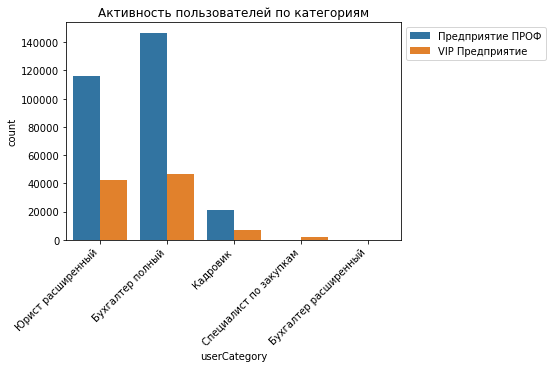

In [12]:
# Отобразим результаты с помощью гистограммы
plt.figure(figsize=(6,4))
sns.countplot(x = 'userCategory', hue = 'subscriptionName', data = data)
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1,1))
plt.title('Активность пользователей по категориям')

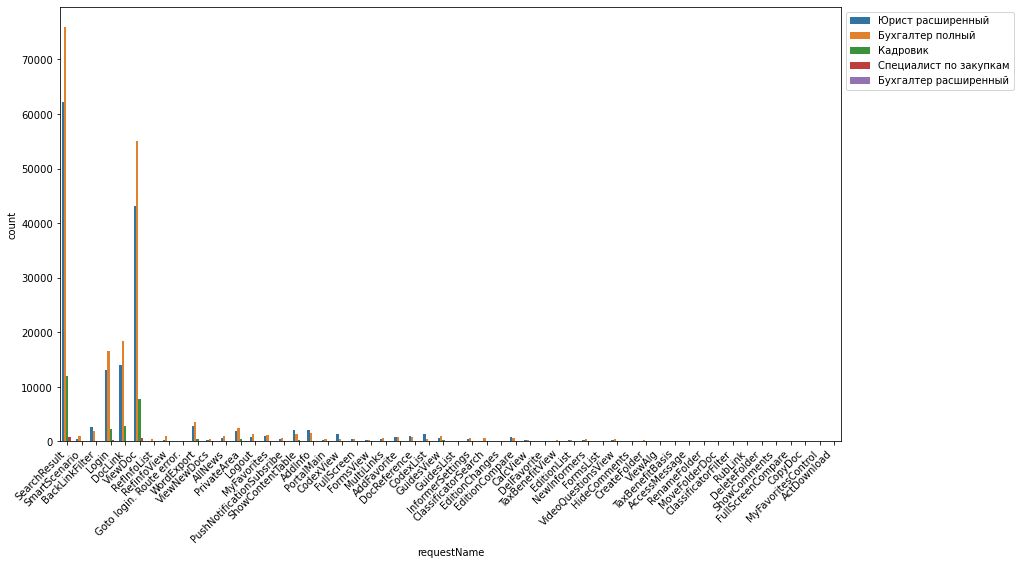

In [13]:
# Отобразим количество событий по категориям с помощью гистограммы
plt.figure(figsize=(14,8))
sns.countplot(x = 'requestName', hue = 'userCategory', data = data)
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1,1))

Из гистограммы видно, что самыми частыми событиями являются "Поисковый запрос" и "Открытие документа для просмотра из любого места системы".

In [14]:
# Сгруппируем данные таким образом, чтобы проанализировать поисковые запросы пользователей для каждого продукта
search_res = data.groupby(['subscriptionName', 'message','searchRequest']).message.count()

<AxesSubplot:ylabel='searchRequest'>

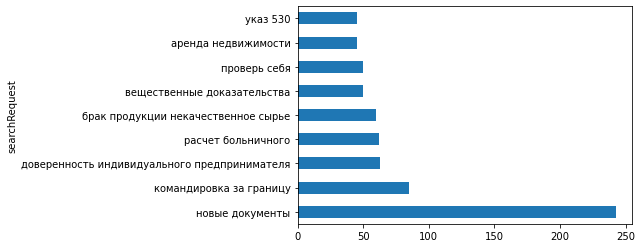

In [15]:
# Отобразим наиболее частые запросы пользователей для продукта VIP Предприятие
search_res['VIP Предприятие']['SearchResult'].sort_values(ascending=False)[1:10].plot(kind='barh', rot=0)

Анализ результатов показывает, что наиболее частыми запросами по продукту VIP Предприятие были новые документы, командировки за границу, доверенность индивидуального предпринимателя, расчет больничного и брак продукции некачественное сырье. 

<AxesSubplot:ylabel='searchRequest'>

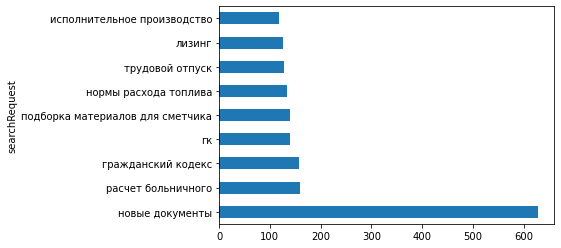

In [16]:
# Отобразим наиболее частые запросы пользователей для продукта Предприятие ПРОФ
search_res['Предприятие ПРОФ']['SearchResult'].sort_values(ascending=False)[1:10].plot(kind='barh', rot=0)

Анализ результатов показывает, что наиболее частыми запросами по продукту Предприятие ПРОФ были новые документы, расчет больничного, гражданский кодекс, подборка материалов для сметчика, нормы расхода топлива, трудовой отпуск и лизинг.

<AxesSubplot:title={'center':'Наиболее частые запросы пользователей "Бухгалтер полный" по продукту Предприятие ПРОФ'}, ylabel='searchRequest'>

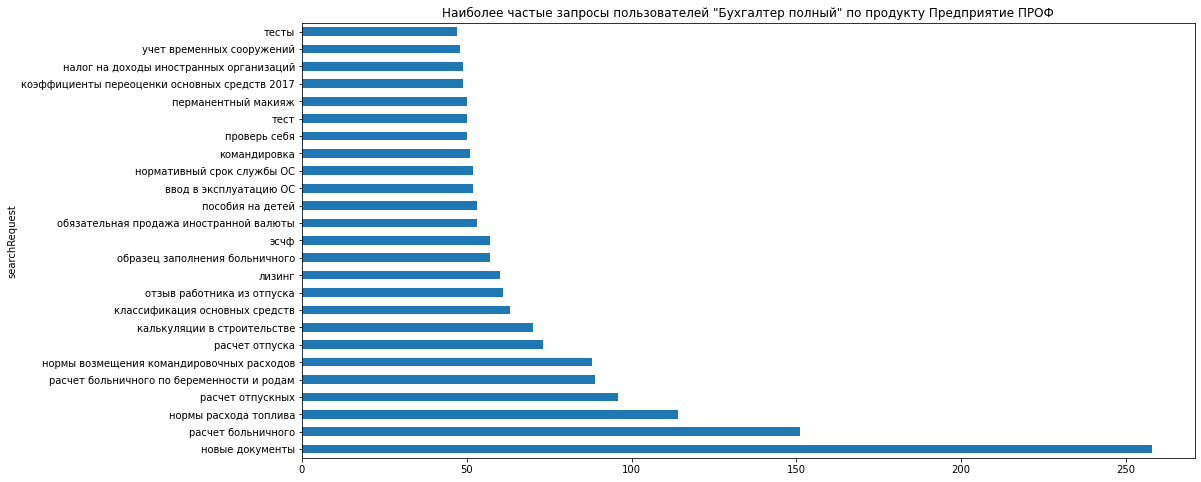

In [17]:
# Отобразим наиболее частые запросы пользователей "Бухгалтер полный" по продукту Предприятие ПРОФ
plt.figure(figsize=(16,8))
plt.title('Наиболее частые запросы пользователей "Бухгалтер полный" по продукту Предприятие ПРОФ')
accountant_prof = data.loc[(data.userCategory == 'Бухгалтер полный') & (data.message == 'SearchResult') &
         (data.subscriptionName == 'Предприятие ПРОФ')]
accountant_prof.groupby(['searchRequest']).message.count().sort_values(ascending=False)[1:26].plot(kind='barh', rot=0)

Из гистограммы видно, что наиболее частыми поисковыми запросами пользователей "Бухгалтер полный" по продукту Предприятие ПРОФ в августе были следующие темы:
+ документы по оформлению отпусков и расчет отпускных;
+ оформление больничных;
+ нормы расхода топлива.

Забавным является факт попадания в выборку запроса по перманентному макияжу.

<AxesSubplot:title={'center':'Наиболее частые запросы пользователей "Юрист расширенный" по продукту Предприятие ПРОФ'}, ylabel='searchRequest'>

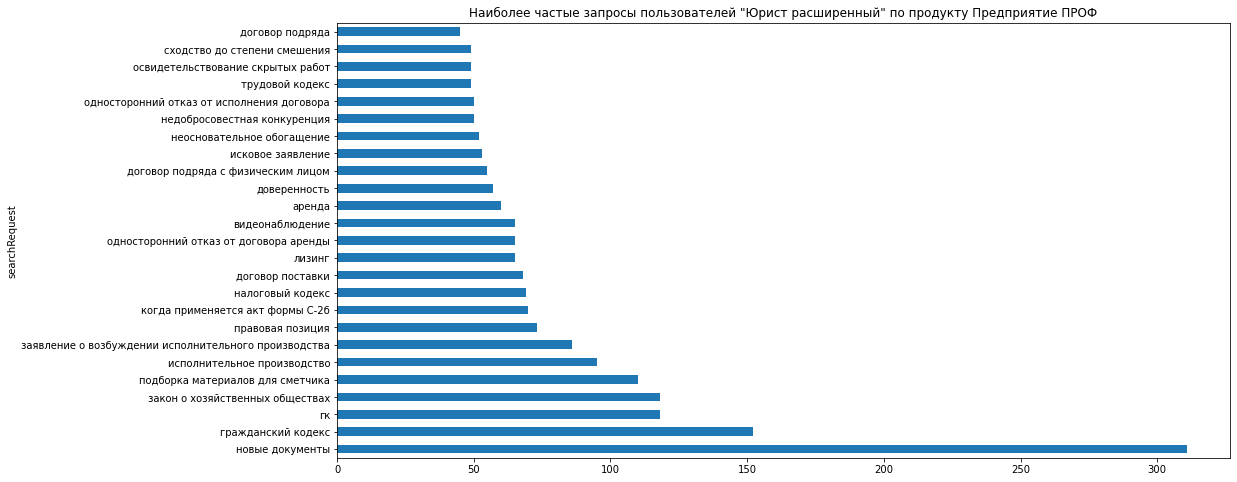

In [18]:
# Отобразим наиболее частые запросы пользователей "Юрист расширенный" по продукту Предприятие ПРОФ
plt.figure(figsize=(16,8))
plt.title('Наиболее частые запросы пользователей "Юрист расширенный" по продукту Предприятие ПРОФ')
lawer_prof = data.loc[(data.userCategory == 'Юрист расширенный') & (data.message == 'SearchResult') &
         (data.subscriptionName == 'Предприятие ПРОФ')]
lawer_prof.groupby(['searchRequest']).message.count().sort_values(ascending=False)[1:26].plot(kind='barh', rot=0)

Из гистограммы видно, что наиболее частыми поисковыми запросами пользователей "Юрист расширенный" по продукту Предприятие ПРОФ в августе были следующие темы:
+ гражданский кодекс;
+ закон о хозяйственных обществах;
+ исполнительное производство.